# Merging lists

In [66]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 500
from matplotlib import pyplot as plt

In [2]:
cats = pd.read_csv('../Data/big_cats/processed_data/unified_animal_list.csv')
labs = pd.read_csv('../Data/big_cats/processed_data/merged_tables_tol_7days_2021-04-01.csv')

In [3]:
data = pd.merge(cats, labs, left_on='ARKS Number', right_on='ARKS No')

In [4]:
# only look at dead animals
data = data[data['Status (alive/deceased/transacted)'] == 'Dead']
data = data[data['Excluded from study?'] == False]

In [5]:
len(data)

1438

# Manual column drop

### 1. based on description

In [6]:
columns_drop = ['Animal Name', 
                'Biochem data', 
                'Cause of Death', 
                'Comments:', 
                'Dam ARKS Number', 
                'Date of Death', 
                'Date of Transaction', 
                'Excluded from study?', 
                'GIT', 
                'Hand-raised', 
                'Housing (confined enclosure/open range)', 
                'International transaction',
                'Pathology Report Numbers',
                'Post Mortem Report Number',
                'Sibling ARKS Number',
                'Sire ARKS Number',
                'Status (alive/deceased/transacted)',
                'Transacted internationally',
                'Unknown',
                'Zoo Location',
                'haem: ID',
                'ARKS No',
                'haem: Animal Name',
                'haem: Laboratory Report No',
                'haem: Laboratory',
                'haem: Laboratory text only',
                'haem: notes:',
                'haem: validated',
                'haem id',
                'haem date',
                'biochem: ID',
                'biochem: Biochem Report No',
                'biochem: Animal Name',
                'biochem: Comments:',
                'biochem: Validated',
                'biochem id',
                'biochem date',
                'urine: ID',
                'urine: Laboratory Report Number',
                'urine: Laboratory',
                'urine: Animal name',
                'urine: Sample Collection Method',
                'urine id',
                'urine date',
                'haem biochem date diff',
                'haem urine date diff',
                'urine biochem date diff',
                'Urine data', 
                'urine: Comments:', 
                'urine: Validated',
                'urine: Date validated by RD',
                'urine: Validated1', 
                'urine: Date validated by RD1',
                'urine: Date validated by RD', 
                'urine: Culture results'
               ]


clean_data = data.drop(columns = columns_drop, axis = 1)

In [7]:
clean_data.to_csv('merged_dropped_data.csv')

### 2. based on values

In [8]:
clean_data.describe(include='all')

,ARKS Number,Acute kidney failure,Age at Death,CKD - cause of mortality,CKD - co-morbidity,Date of Birth,Endocrine,Infection,Neonatal,Neoplasia,Neurological,Old Age debility,Respiratory/Cardiovascular,Sex,Species (common name),Trauma,Date,haem: RBC (x 10^12/L),haem: haemoglobin (g/L),haem: HCT (%),haem: Total Protein (refractometer),haem: leukocyte count (x10^9/L),haem: neutrophils (%),haem: neutrophils (band),haem: neutrophils(seg) (x10^9/L),haem: lymphocytes (x10^9/L),haem: lymphocytes (%),haem: monocytes (x10^9/L),haem: monocytes (%),haem: eosinophils (x10^9/L),haem: eosinophils (%),haem: estimated platelets x 10^9/L (Hi),haem: estimated platelets /HPF (Low),haem: plasma sample appearance,haem: MCV (fL),haem: MCHC (g/L),haem: MCH (pg),haem: RBC morphology,biochem: Low USG?,biochem: BUN (mmol/L),biochem: Hypercreatininaemia?,biochem: Creatinine (umol/L),biochem: Total Plasma Protein (g/L),biochem: Serum Albumin (g/L),biochem: Globulins (g/L),biochem: Anaemic? <25,biochem: Haematocrit (%),biochem: Potassium (mmol/L),biochem: Calcium (mmol/L),biochem: Hyperphosphataemia? >2_9 to 3,biochem: Phosphate (mmol/L),biochem: Sodium (mmol/L),biochem: Chloride (mmol/L),biochem: Bicarbonate,biochem: Glucose,biochem: CK (U/L),biochem: ALP (U/L),biochem: ALT (U/L),biochem: AST,biochem: Amylase,biochem: Cholesterol (mmol/L),biochem: Bilirubin,biochem: Serum/plasma appearance,urine: Urine Appearance,urine: Urine Specific Gravity,urine: Low USG?,urine: Azotaemia?,urine: Urine protein (g/L),urine: urine creatinine (umol/l),urine: Protein:creatinine ratio,urine: Proteinuric UPC greater 0:4,urine: Heska Microalbuminuria test,urine: glucose (Multistix),urine: bilirubin (Multistix),urine: ketones (Multistix),urine: blood (Hb -Multistix),urine: pH,urine: protein (Multistix),urine: protein (sulfanilic acid),urine: Positive urine culture,urine: Positive urine culture comments,urine: leukocytes (/cumm)x,urine: blood (RBC/ ul) (haematuriax,urine: Fat droplets,urine: Lipid,urine: Casts,urine: Epith cells,urine: Crystals,urine: Organisms,urine: Contaminants?,urine: Fractional Excretion,urine: Feline specific USG,urine: Refractive Index nR,urine: Fractional Excretion1,urine: Fe Sodium (RI 0-0_0-07),urine: Fe Potassium (RI 0-0_11-7),urine: Fe Chloride (RI 0-0_0-20),urine: FE Calcium (RI 0-0_0-13),urine: FE Phosphorus (RI 0_16)
count,1438,1438,1304,1438,1438,1437,1438,1438,1438,1438,1438,1438,1438,1438,1438,1438,1438,290.000000,433,455.000000,249.000000,446.000000,287.000000,131.000000,311.000000,345.000000,230.000000,330.000000,209.000000,289.000000,193.000000,184,168,57,118.000000,127.000000,68.000000,132,1071,1049.000000,1071,1046.000000,1044.000000,999.000000,986.000000,1071,940.000000,871.000000,876.000000,1071,890.000000,857.000000,789.000000,551.000000,737.000000,909.000000,923.000000,1000.000000,919.000000,339.000000,568.000000,743,178,247,721,762,762,61.000000,61.000000,68.000000,762,27,623,597,611,638,659,683,28,762,57,243,248,35,762,762,762,762,762,762,4,1.000,1.0000,0.0,6.000000,6.000000,6.000000,4.0,4.000000
unique,187,2,156,2,2,151,2,2,1,2,2,2,2,2,25,2,1270,NaN,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,52,11,NaN,NaN,NaN,54,2,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,24,108,80,2,2,NaN,NaN,NaN,2,8,9,11,9,21,19,14,8,2,18,64,75,9,2,2,2,2,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A20021,False,13y7m12d,False,False,2000-07-29,False,False,False,False,False,False,False,male,Cheetah,False,1985-09-09 00:00:00,NaN,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286,adequate,clear,NaN,NaN,NaN,normal,False,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,clear,clear yellow,>1.040,False,False,NaN,NaN,NaN,False,NEGATIVE,nil,nil,nil,nil,6.5,1+,nil,False,no,0,0,1+,False,False,False,False,False,False,Ca 0.1% Cl 0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,53,1422,53,783,989,75,1437,1420,1438,1210,1396,1263,1409,801,402,1335,4,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [9]:
drop_columms = ['Neonatal', 'Endocrine', 'haem: estimated platelets  /HPF (Low)', 'haem: RBC morphology', 'urine: Urine Appearance',  'biochem: Serum/plasma appearance', 'haem: plasma sample appearance',  'urine: FE Phosphorus (RI 0_16)', 'urine: Heska Microalbuminuria test', 'urine: protein (sulfanilic acid)', 'urine: Positive urine culture comments', 'urine: Fat droplets', 'urine: Fractional Excretion', 'urine: Feline specific USG', 'urine: Refractive Index nR', 'urine: Fractional Excretion1', 'urine: Fe Sodium (RI 0-0_0-07)', 'urine: Fe Potassium (RI 0-0_11-7)', 'urine: Fe Chloride (RI 0-0_0-20)', 'urine: FE Calcium (RI 0-0_0-13)', 'urine: FE Phosphorus (RI 0_16)']
clean_up = ['urine: Urine Specific Gravity', 'urine: glucose (Multistix)', 'urine: bilirubin (Multistix)', 'urine: ketones (Multistix)', 'urine: blood (Hb -Multistix)', 'urine: pH', 'urine: protein (Multistix)', 'urine: leukocytes (/cumm)x', 'urine: blood (RBC/ ul) (haematuriax']

In [10]:
data_filt = clean_data.drop(columns=drop_columms)

In [11]:
data_filt.describe(include='all')

,ARKS Number,Acute kidney failure,Age at Death,CKD - cause of mortality,CKD - co-morbidity,Date of Birth,Infection,Neoplasia,Neurological,Old Age debility,Respiratory/Cardiovascular,Sex,Species (common name),Trauma,Date,haem: RBC (x 10^12/L),haem: haemoglobin (g/L),haem: HCT (%),haem: Total Protein (refractometer),haem: leukocyte count (x10^9/L),haem: neutrophils (%),haem: neutrophils (band),haem: neutrophils(seg) (x10^9/L),haem: lymphocytes (x10^9/L),haem: lymphocytes (%),haem: monocytes (x10^9/L),haem: monocytes (%),haem: eosinophils (x10^9/L),haem: eosinophils (%),haem: estimated platelets x 10^9/L (Hi),haem: MCV (fL),haem: MCHC (g/L),haem: MCH (pg),biochem: Low USG?,biochem: BUN (mmol/L),biochem: Hypercreatininaemia?,biochem: Creatinine (umol/L),biochem: Total Plasma Protein (g/L),biochem: Serum Albumin (g/L),biochem: Globulins (g/L),biochem: Anaemic? <25,biochem: Haematocrit (%),biochem: Potassium (mmol/L),biochem: Calcium (mmol/L),biochem: Hyperphosphataemia? >2_9 to 3,biochem: Phosphate (mmol/L),biochem: Sodium (mmol/L),biochem: Chloride (mmol/L),biochem: Bicarbonate,biochem: Glucose,biochem: CK (U/L),biochem: ALP (U/L),biochem: ALT (U/L),biochem: AST,biochem: Amylase,biochem: Cholesterol (mmol/L),biochem: Bilirubin,urine: Urine Specific Gravity,urine: Low USG?,urine: Azotaemia?,urine: Urine protein (g/L),urine: urine creatinine (umol/l),urine: Protein:creatinine ratio,urine: Proteinuric UPC greater 0:4,urine: glucose (Multistix),urine: bilirubin (Multistix),urine: ketones (Multistix),urine: blood (Hb -Multistix),urine: pH,urine: protein (Multistix),urine: Positive urine culture,urine: leukocytes (/cumm)x,urine: blood (RBC/ ul) (haematuriax,urine: Lipid,urine: Casts,urine: Epith cells,urine: Crystals,urine: Organisms,urine: Contaminants?
count,1438,1438,1304,1438,1438,1437,1438,1438,1438,1438,1438,1438,1438,1438,1438,290.000000,433,455.000000,249.000000,446.000000,287.000000,131.000000,311.000000,345.000000,230.000000,330.000000,209.000000,289.000000,193.000000,184,118.000000,127.000000,68.000000,1071,1049.000000,1071,1046.000000,1044.000000,999.000000,986.000000,1071,940.000000,871.000000,876.000000,1071,890.000000,857.000000,789.000000,551.000000,737.000000,909.000000,923.000000,1000.000000,919.000000,339.000000,568.000000,743,721,762,762,61.000000,61.000000,68.000000,762,623,597,611,638,659,683,762,243,248,762,762,762,762,762,762
unique,187,2,156,2,2,151,2,2,2,2,2,2,25,2,1270,NaN,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,80,2,2,NaN,NaN,NaN,2,9,11,9,21,19,14,2,64,75,2,2,2,2,2,2
top,A20021,False,13y7m12d,False,False,2000-07-29,False,False,False,False,False,male,Cheetah,False,1985-09-09 00:00:00,NaN,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,>1.040,False,False,NaN,NaN,NaN,False,nil,nil,nil,nil,6.5,1+,False,0,0,False,False,False,False,False,False
freq,53,1422,53,783,989,75,1420,1210,1396,1263,1409,801,402,1335,4,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,889,NaN,943,NaN,NaN,NaN,NaN,1045,NaN,NaN,NaN,1066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,59,487,690,NaN,NaN,NaN,748,534,535,535,212,128,216,726,49,33,732,725,724,665,670,734
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.540690,NaN,40.166593,75.622490,12.993229,77.226481,7.202061,9.016531,1.847249,14.917391,0.523515,3.454545,0.700104,4.831088,NaN,59.936441,325.899213,18.342647,NaN,18.162278,NaN,259.608080,72.512452,33.646246,38.470690,NaN,39.497021,4.364076,2.568644,NaN,1.955070,152.774212,118.396705,16.561706,8.963245,669.603960,26.970748,117.340100,83.374102,2307.914454,4.960343,NaN,NaN,NaN,NaN,24.174426,14537.118689,0.679443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.631115,NaN,7.522690,12.11

# Manual clean-up for important columns

In [12]:
clean_up

['urine: Urine Specific Gravity',
 'urine: glucose (Multistix)',
 'urine: bilirubin (Multistix)',
 'urine: ketones (Multistix)',
 'urine: blood (Hb -Multistix)',
 'urine: pH',
 'urine: protein (Multistix)',
 'urine: leukocytes (/cumm)x',
 'urine: blood (RBC/ ul) (haematuriax']

### Side-info: Multistix

<div style="padding: 1rem ;color: DeepPink; font-weight:600; background-image: linear-gradient(to right, FloralWhite, DeepPink)">! check with vet if nil == negative</div>

<img src='https://cdn.shopify.com/s/files/1/0713/2143/products/urs-color-chart_759x677.jpg?v=1568747501]'>

##### glucose (Multistix)

Semi-quantitative values are usually reported as: trace, 1+, 2+, 3+ and 4+; although tests can also be estimated as milligrams per decilitre. Automated readers of test strips also provide results using units from the International System of Units.
[wikipedia](https://en.wikipedia.org/wiki/Urine_test_strip)

### 1. Urine Specific Gravity

In [13]:
data_filt[clean_up[0]].unique()

array([nan, '1.044', '1.028', '>1.060', '1.077', '1.020', '>1.040',
       '1.038', '>1.050', '>1.045', '1.045', '1.000', '1.040', '1.024',
       '1.035', '1.032', '1.037', '1.022', '1.017', '1.014', '1.042',
       '1.026', '1.023', '1.010', '1.036', '1.070', '1.050', '1.025',
       '1.019', '1.047', '1.016', '1.015', '1.013', '1.033', '1.056',
       '2.068', '1.080', '2', '1.060', '1.018', '1.008', '1.030', '1.046',
       '>>1.040', '1.012', '1.043', '1.055', '>1.035', '1.041', '1.052',
       '>1.080', '1.048', '1.034', '>1.065', '1.031', '1.027', '1.039',
       '1.074', '1.054', '1.098', '1.072', '1.068', '1.062', '1.090',
       '1.04', '>1.070', '1.021', '1.066', '>>1.045', '1.029', '1.049',
       '1.03', '1.05', '1.002', '1.065', '1.057', '>1.075', '1.004',
       '1.006', '>>1.050', '1.061'], dtype=object)

add another column if USG value contained '>' or '>>', then filter

In [14]:
data_filt['usg_maxed_out'] = data_filt[clean_up[0]].apply(lambda x: 1 if '>' in str(x) else 0)

In [15]:
data_filt[clean_up[0]] = data_filt[clean_up[0]].apply(lambda x: float(str(x).replace('>', '')))

In [16]:
data_filt[clean_up[1]].value_counts()

nil         534
trace        26
negative     24
2+           17
1+            8
3+            6
4+            6
+             1
-             1
Name: urine: glucose (Multistix), dtype: int64

### 2. glucose (Multistix)

In [17]:
data_filt[clean_up[1]] = data_filt[clean_up[1]].apply(lambda x: str(x).replace('-', 'negative'))
data_filt[clean_up[1]].replace({'+': '1+'}, inplace=True)

### 3. bilirubin (Multistix)

In [18]:
data_filt[clean_up[2]].value_counts()

nil         535
negative     22
1+           21
3+            8
2+            4
4+            2
niil          1
large         1
trace         1
ni            1
-             1
Name: urine: bilirubin (Multistix), dtype: int64

In [19]:
data_filt[clean_up[2]].replace({'-': 'negative', 'niil': 'nil', 'large': '3+', 'ni': 'nil'}, inplace=True)

### 4. ketones (Multistix)

In [20]:
data_filt[clean_up[3]].value_counts()

nil         535
negative     24
1+           16
3+           13
trace        11
2+            8
4+            2
nuil          1
+             1
Name: urine: ketones (Multistix), dtype: int64

In [21]:
data_filt[clean_up[3]].replace({'nuil': 'nil', '+': '1+'}, inplace=True)

In [22]:
data_filt[clean_up[3]].value_counts()

nil         536
negative     24
1+           17
3+           13
trace        11
2+            8
4+            2
Name: urine: ketones (Multistix), dtype: int64

### 5. blood (Hb -Multistix)

<div style="padding: 1rem ;color: yellow; font-weight:600; background-image: linear-gradient(to right, red , yellow)">! check with vet if this is ok - making two distinct columns</div>

In [23]:
data_filt[clean_up[4]].value_counts()

nil                   212
4+                    118
3+                     97
2+                     71
trace                  62
1+                     53
negative                7
trace haemolysed        4
0                       2
3+ haemolysed           1
trace (haemolysed)      1
haemolysed              1
moderate 80             1
1                       1
1+ haemolysed           1
large                   1
12                      1
1+ (small)              1
+                       1
5+                      1
il                      1
Name: urine: blood (Hb -Multistix), dtype: int64

In [24]:
data_filt['urine: blood haemolysed'] = data_filt[clean_up[4]].apply(lambda x: 1 if 'haem' in str(x) else 0)

data_filt[clean_up[4]] = data_filt[clean_up[4]].apply(lambda x: str(x).replace(' (haemolysed)', ''))
data_filt[clean_up[4]] = data_filt[clean_up[4]].apply(lambda x: str(x).replace(' haemolysed', ''))
data_filt[clean_up[4]] = data_filt[clean_up[4]].apply(lambda x: str(x).replace(' (small)', ''))
data_filt[clean_up[4]] = data_filt[clean_up[4]].apply(lambda x: str(x).replace('haemolysed', 'nil'))

data_filt[clean_up[4]].replace({'large': '4+', 'il': 'nil', '+': '1+', '1': '1+'}, inplace=True)

In [25]:
data_filt[clean_up[4]].value_counts()

nan            800
nil            214
4+             119
3+              98
2+              71
trace           67
1+              57
negative         7
0                2
5+               1
12               1
moderate 80      1
Name: urine: blood (Hb -Multistix), dtype: int64

<div style="padding: 1rem ;color: DarkBlue; font-weight:600; background-image: linear-gradient(to right, lightgreen, DarkTurquoise)">! check with vet or resources about 0, 12, 'moderate 80'.</div>

### 6. pH

In [26]:
data_filt[clean_up[5]].value_counts()

6.5      128
6        117
6.0      107
8.5       51
7.0       43
7.5       43
5         39
5.0       26
8.0       21
7         19
9         18
8         17
5.5       14
9.0       11
trace      1
>9.0       1
4+         1
6.2        1
8.8        1
Name: urine: pH, dtype: int64

In [27]:
data_filt[clean_up[5]].replace({'4+': np.nan, 'trace': np.nan, '>9.0': 9}, inplace=True)
data_filt[clean_up[5]] = data_filt[clean_up[5]].astype('float')
data_filt[clean_up[5]].describe()

count    657.000000
mean       6.631659
std        1.066209
min        5.000000
25%        6.000000
50%        6.500000
75%        7.000000
max        9.000000
Name: urine: pH, dtype: float64

### 7. protein (Multistix)

In [28]:
data_filt[clean_up[6]].value_counts()

1+          216
2+          184
3+          118
trace        61
4+           46
nil          45
negative      5
5             2
3.0g/L        1
100           1
1.0           1
2+ (1.0)      1
+             1
-             1
Name: urine: protein (Multistix), dtype: int64

protein is measured in mg/dL
g/L --> mg/dL is x 1000 then divide by 10 --> x 100
3.0 --> 300

In [29]:
data_filt[clean_up[6]].replace({'5':np.nan, '100':'2+', '+':'1+', '2+ (1.0)':'2+', '-':'negative', '3.0g/L':'3+', '1.0':np.nan}, inplace=True)
data_filt[clean_up[6]].value_counts()

1+          217
2+          186
3+          119
trace        61
4+           46
nil          45
negative      6
Name: urine: protein (Multistix), dtype: int64

### 8. leukocytes (/cumm)x

In [30]:
data_filt[clean_up[7]].value_counts()

0                49
<10              22
<5               18
10               18
50               14
20                9
nil               7
>100              7
5                 7
30                6
4+                4
<1                4
10 x 10^6/L       4
1+                4
2+                3
10-100            3
100               3
40                3
15                2
>200/hpf          2
60                2
>5000             2
180               2
800               2
540               2
20 x 10^6/L       2
<5/hpf            2
70                2
2-5               2
120               2
                 ..
50-100            1
18                1
6                 1
50-100/hpf        1
11                1
5-10              1
170 x 10^6/L      1
7                 1
2                 1
1                 1
400               1
38                1
4                 1
27                1
90                1
79                1
>1000             1
1-5/hpf           1
110               1


In [31]:
data_filt[clean_up[7]].replace({'0':'negative', '<10':'negative','10':'negative','<5':'negative','5':'negative','<1':'negative','2-5':'negative','1-2':'negative','7':'negative','-':'negative','5-10':'negative','2':'negative','6':'negative','11':'negative','4':'negative','1-5':'negative','0-3':'negative','0-1':'negative','14':'negative','1':'negative',
                               '50':'trace','20':'trace','30':'trace','40':'trace','60':'trace','15':'trace','32':'trace','27':'trace','16':'trace','18':'trace','38':'trace',
                               '100':'1+','>100':'1+','70':'1+','120':'1+','80':'1+','110':'1+','79':'1+','90':'1+',
                               '180':'2+','150':'2+','130':'2+','170':'2+','400':'2+',
                               '800':'3+','540':'3+','>5000':'3+', '>1000':'3+',
                               '10 x 10^6/L':'negative', '20 x 10^6/L': 'trace', '170 x 10^6/L':'2+', '3+ (dipstick)':'3+',
                               '10-100':'trace', '50-100':'1+'}, inplace=True)
data_filt[clean_up[7]].value_counts()

negative      137
trace          46
1+             23
2+             10
3+              9
nil             7
4+              4
<5/hpf          2
>200/hpf        2
1-5/hpf         1
1-2/hpf         1
50-100/hpf      1
Name: urine: leukocytes (/cumm)x, dtype: int64

### 9. blood (RBC/ ul) (haematuriax)

In [32]:
data_filt[clean_up[8]].value_counts()

0                33
<10              20
>100             18
<5               17
20               11
10               11
>1000            10
nil               7
>200              7
50                6
10-100            6
100               6
3+                5
30                4
4+                4
40                3
5-10              3
270               3
>500              2
180               2
5/hpf             2
450               2
2                 2
8                 2
80                2
150               2
2+                2
18                2
50-100            2
60                2
                 ..
20-30             1
5-8               1
3                 1
35                1
0-2/hpf           1
15/hpf            1
400               1
30-50             1
33/hpf            1
200               1
10-50             1
1/hpf             1
1-4/hpf           1
100  x 10^6/L     1
<1                1
160               1
230               1
0-3               1
10-20             1


<div style="padding: 1rem ;color: DarkBlue; font-weight:600; background-image: linear-gradient(to right, lightgreen, DarkTurquoise)">! Decide to drop 9. blood (RBC/ ul) (haematuriax) for now
    
CONTINUE HERE - check with vet or resources about hpf and check that e.g. 10-100 can be converted to 'trace' (how does hpf map to cells/ul?)</div>

In [36]:
data_filt.head()

,ARKS Number,Acute kidney failure,Age at Death,CKD - cause of mortality,CKD - co-morbidity,Date of Birth,Infection,Neoplasia,Neurological,Old Age debility,Respiratory/Cardiovascular,Sex,Species (common name),Trauma,Date,haem: RBC (x 10^12/L),haem: haemoglobin (g/L),haem: HCT (%),haem: Total Protein (refractometer),haem: leukocyte count (x10^9/L),haem: neutrophils (%),haem: neutrophils (band),haem: neutrophils(seg) (x10^9/L),haem: lymphocytes (x10^9/L),haem: lymphocytes (%),haem: monocytes (x10^9/L),haem: monocytes (%),haem: eosinophils (x10^9/L),haem: eosinophils (%),haem: estimated platelets x 10^9/L (Hi),haem: MCV (fL),haem: MCHC (g/L),haem: MCH (pg),biochem: Low USG?,biochem: BUN (mmol/L),biochem: Hypercreatininaemia?,biochem: Creatinine (umol/L),biochem: Total Plasma Protein (g/L),biochem: Serum Albumin (g/L),biochem: Globulins (g/L),biochem: Anaemic? <25,biochem: Haematocrit (%),biochem: Potassium (mmol/L),biochem: Calcium (mmol/L),biochem: Hyperphosphataemia? >2_9 to 3,biochem: Phosphate (mmol/L),biochem: Sodium (mmol/L),biochem: Chloride (mmol/L),biochem: Bicarbonate,biochem: Glucose,biochem: CK (U/L),biochem: ALP (U/L),biochem: ALT (U/L),biochem: AST,biochem: Amylase,biochem: Cholesterol (mmol/L),biochem: Bilirubin,urine: Urine Specific Gravity,urine: Low USG?,urine: Azotaemia?,urine: Urine protein (g/L),urine: urine creatinine (umol/l),urine: Protein:creatinine ratio,urine: Proteinuric UPC greater 0:4,urine: glucose (Multistix),urine: bilirubin (Multistix),urine: ketones (Multistix),urine: blood (Hb -Multistix),urine: pH,urine: protein (Multistix),urine: Positive urine culture,urine: leukocytes (/cumm)x,urine: blood (RBC/ ul) (haematuriax,urine: Lipid,urine: Casts,urine: Epith cells,urine: Crystals,urine: Organisms,urine: Contaminants?,usg_maxed_out,urine: blood haemolysed
5,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1987-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,False,27.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,False,trace,nil,nil,nil,6.5,1+,False,NaN,NaN,False,False,False,False,False,False,0,0
6,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-05-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,89.0,NaN,NaN,False,41.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044,False,False,NaN,NaN,NaN,False,nan,NaN,NaN,nan,6.0,1+,False,NaN,NaN,False,False,False,False,False,False,0,0
7,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,11.85,True,319.0,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1432.0,NaN,NaN,NaN,NaN,NaN,NaN,1.028,True,True,NaN,NaN,NaN,False,nil,nil,nil,nil,6.5,1+,False,NaN,NaN,False,False,False,False,False,False,0,0
8,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1988-11-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12.51,False,NaN,70.0,36.0,34.0,False,45.0,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,102.0,13.0,46.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
9,Koyukon,False,NaN,False,True,1974-01-01,False,False,False,False,False,male,Northern (Canadian) Lynx,False,1987-02-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.060,False,False,NaN,NaN,NaN,False,nan,NaN,NaN,nan,7.0,3+,False,NaN,NaN,False,False,False,False,False,False,1,0


# Add age column

In [42]:
data_filt['Date dt'] = pd.to_datetime(data_filt['Date'])
data_filt['Date of Birth dt'] = pd.to_datetime(data_filt['Date  of Birth'])

In [48]:
data_filt['age at visit'] = data_filt['Date dt'] - data_filt['Date of Birth dt']

# Add number of visits column

In [58]:
visit_dict = data_filt.groupby(['ARKS Number'])['Date'].count()

In [59]:
data_filt['num visits'] = data_filt['ARKS Number'].apply(lambda x: visit_dict[x])

(array([57., 14., 20.,  7., 16.,  8.,  7.,  6.,  2.,  4.,  8.,  3.,  2.,
         4.,  7.,  4.,  4.,  2.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.  ,  2.04,  3.08,  4.12,  5.16,  6.2 ,  7.24,  8.28,  9.32,
        10.36, 11.4 , 12.44, 13.48, 14.52, 15.56, 16.6 , 17.64, 18.68,
        19.72, 20.76, 21.8 , 22.84, 23.88, 24.92, 25.96, 27.  , 28.04,
        29.08, 30.12, 31.16, 32.2 , 33.24, 34.28, 35.32, 36.36, 37.4 ,
        38.44, 39.48, 40.52, 41.56, 42.6 , 43.64, 44.68, 45.72, 46.76,
        47.8 , 48.84, 49.88, 50.92, 51.96, 53.  ]),
 <BarContainer object of 50 artists>)

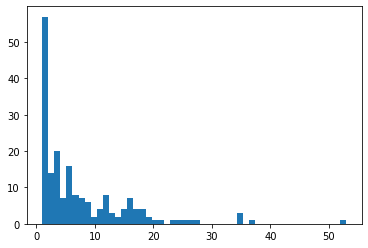

In [69]:
plt.hist(visit_dict.values, bins = 50)

<div style='color: FloralWhite; padding: 2rem; background-image: radial-gradient(farthest-corner at 40px 40px,
      #f35 0%, #43e 100%); font-weight: 500'>
<h2 style='padding: 0; margin-bottom: 1rem; margin-top:0;'> NEXT STEPS </h2>
      
<li>clean values for clean_up {done-waiting on advice from vet}</li>
<li>calculate age at each visit {done}</li>
<li>impute missing values</li>
<li>look at number of records per cat {done}</li>
<li>look at pattern and % missing values for analytes we're interested in</li>
<li>case/control distributions of key analytes</li>
<li>read the stats from Rachel's thesis</li>
<li>one-hot encoding of categorical columns </li>
<li>PCA, try some basic models</li>
    </div>
    

##### everything summary whatever

In [33]:
for i in range(len(clean_up)): 
    print(clean_up[i], data_filt[clean_up[i]].value_counts())

urine: Urine Specific Gravity 1.040    90
1.050    77
1.060    42
1.045    35
1.030    25
1.020    23
1.038    22
1.032    22
1.022    22
1.042    21
1.036    20
1.035    16
1.046    16
1.017    14
1.014    14
1.024    13
1.070    13
1.044    12
1.016    12
1.031    11
1.034    11
1.018    11
1.055    10
1.080    10
1.048     9
1.027     9
1.047     9
1.028     8
1.019     8
1.013     7
         ..
1.023     6
1.054     6
1.065     5
1.043     5
1.026     4
1.039     4
1.021     4
1.015     4
1.000     3
1.090     3
1.049     3
1.008     3
2.000     2
1.056     2
1.004     1
1.061     1
1.002     1
1.077     1
1.074     1
1.006     1
1.072     1
1.041     1
1.068     1
1.057     1
1.098     1
1.062     1
1.010     1
1.066     1
2.068     1
1.075     1
Name: urine: Urine Specific Gravity, Length: 66, dtype: int64
urine: glucose (Multistix) nan         815
nil         534
trace        26
negative     25
2+           17
1+            9
3+            6
4+            6
Name: urine: glucose 

___

# old things

one-hot encoding

In [34]:
bool_cols = []
float_cols = []
object_cols = []
for key in data_filt.columns:
    if data_filt[key].dtype == 'bool' or len(data_filt[key].unique()) <=3:
        bool_cols.append(key)
    elif data_filt[key].dtype == 'float64':
        float_cols.append(key)
    elif data_filt[key].dtype == 'O':
        object_cols.append(key)
    else:
        print('whoopsies: ', key, data_filt[key].dtype)

In [35]:
data_dummy = pd.get_dummies(data_filt,columns=bool_cols, drop_first=False)

### encoding and cleaning of the remainder
* **ARKS number:** leave as is but use as index only (remove for analysis)
* **drop:** 
* **one-hot:** Species (common name)
* **float64 with minimal cleaning:** haem: estimated platelets x 10^9/L (Hi), haem: haemoglobin (g/L), urine: pH, biochem: Bilirubin 
* **clean:** Age at Death(convert to days), urine: Urine Appearance, urine: Urine Specific Gravity, urine: Urine Specific Gravity, urine: bilirubin (Multistix), urine: ketones (Multistix), urine: blood (Hb -Multistix), urine: leukocytes, urine: blood (RBC/ ul) (haematuriax
* **TBD:** haem: estimated platelets  /HPF (Low), haem: plasma sample appearance, haem: RBC morphology, biochem: Serum/plasma appearance, urine: Positive urine culture comments

* calculate age at visit